In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (9, 9)

## Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
try:
    data_1 = pd.read_csv('mkrf_movies.csv')
    data_2 = pd.read_csv('mkrf_shows.csv')
except:
    data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
    data_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
display(data_1.head())
display(data_2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [4]:
data_1.info()
print()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В первом датафрейме тип данных в столбце `puNumber` - `object`, во втором - `int64`.  
Чтобы объединить датафремы по этому столбцу приведем все данные к одному типу - к числовому.  
Для начала проверим, есть ли какие-то значения, которые не приведутся к типу `int`.

In [5]:
data_1[~(data_1['puNumber'].str.isdigit())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_1.loc[804, 'puNumber']

' 111004112'

Все значения в столбце `puNumber` первого датафрейма имеют строковый тип.  
В строке с индексом *804* перед числом стоит пробел - заменим его пустой строкой;  
В строке *1797* вместо числа стоит "нет". Заменим значение в ней на следующий по порядку номер из второго набора данных.

In [7]:
data_1.loc[804, 'puNumber'] = data_1.loc[804]['puNumber'].replace(' ', '')
data_1.loc[1797, 'puNumber'] = str(data_2['puNumber'].max() + 1)

data_1[~(data_1['puNumber'].str.isdigit())]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Готово.  
Можно приводить этот столбец к числовому типу и объединять датафреймы.  
Заодно переименуем этот столбец в соответствии со snake_case_style.

In [8]:
data_1['puNumber'] = pd.to_numeric(data_1['puNumber'])

data = pd.merge(data_1, data_2, on='puNumber', how='left')
data.rename({'puNumber': 'pu_number'}, inplace=True, axis=1)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**РЕЗУЛЬТАТ:**  
В итоговый датафрейм `data` вошли все строки из датасета `mkrf_movies`. Добавили столбец с кассовыми сборами. Пропуски в этом столбце говорят об отсутствии информации о сборах.

## Предобработка данных

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

`show_start_day` - необходимо привести к типу `datetime`;  

`ratings` - необходимо привести к типу `float`;

In [11]:
data['show_start_date'] = pd.to_datetime(
    data['show_start_date'].apply(lambda x: x[:10]), format='%Y-%m-%d')

data['show_start_date'].head()

0   2015-11-27
1   2016-09-13
2   2016-10-10
3   2016-06-10
4   2015-07-29
Name: show_start_date, dtype: datetime64[ns]

In [12]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [13]:
# заменяем значения рейтинга вида "xz%" на "x.z"

ratings_percent = data[(data['ratings'].str.find('%') != -1)
                       & ~(data['ratings'].isna())]['ratings'].apply(
                           lambda x: int(x[:-1]) / 10)

In [14]:
data.loc[ratings_percent.index, 'ratings'] = ratings_percent

data['ratings'] = pd.to_numeric(data['ratings'])

data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

**РЕЗУЛЬТАТЫ:**  
Все столбцы имеют тип данных, соответствующий их содержанию.

### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
def show_missing():
    """
        Возвращает датафрейм с информацией о пропусках в датафрейме data
    """
    missing = {'col_name': [], 'missing_rate': [], 'col_type': []}

    for col in data.columns:
        if data[col].isna().mean() != 0:
            missing['col_name'].append(col)
            missing['missing_rate'].append(data[col].isna().mean())
            missing['col_type'].append(data[col].dtype)

    missing_df = pd.DataFrame(missing,
                              index=missing['col_name']).drop('col_name',
                                                              axis=1)
    display(missing_df.sort_values(by='missing_rate', ascending=False))

In [17]:
show_missing()

,missing_rate,col_type
refundable_support,0.955651,float64
nonrefundable_support,0.955651,float64
budget,0.955651,float64
financing_source,0.955651,object
box_office,0.578146,float64
genres,0.130377,object
ratings,0.129174,float64
producer,0.075875,object
film_studio,0.002404,object
director,0.001202,object


Рассмотрим ключевые столбцы в этой задаче. Ключевыми будем называть столбцы, которые должны быть использованы для выполнения основоных заданий проекта.  

Ключевые для исследования столбцы:  
1) `type` - нет пропусков  
2) `show_start_date` - нет пропусков  
3) `director` - предположительно, режиссёр неизвестен или у картины нет режиссёра  
4) `genres` - предположительно, картина не подходит ни под один из известных жанров или понятие жанра не применимо к этой картине  
5) `budget` - не пропущено только для картин, получивших гос поддержку  
6) `refundable_support`, `nonrefundable_support`, `financing_source` - не пропущено только для картин, получивших гос поддержку  
7) `box_office` - возможно, фильм не был в прокате в России  
8) `age_restriction` - нет пропусков  
9) `ratings` - на сайте КиноПоиск нет этого фильма или для него нет рейтинга

Для столбцов `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` заполнять пропуски не будем, поскольку нам интересны фильмы, которые получили гос. поддержку, а как раз для них значение в этих столбцах не пропущены.  
  
Пропуски в столбце `box_office` также оставим без заполнения, поскольку далее по заданию требуется использовать факт наличия пропуска для формирования выводов.

#### ratings

Заполним пропуски заглушкой - "-1", это будет сигналом о том, что в этом месте был пропуск, не изменит тип данных в столбце в отличие от заглушки "Неизветсно", но именно такой смысл будет носить.

In [18]:
data['ratings'].fillna(-1, inplace=True)

#### producer, film_studio

Имя продюсера и название студии не потребуется в этом иследовании, поэтому можно заполнить пропуски значением "Неизвестно"

In [19]:
data['producer'].fillna('Неизвестно', inplace=True)
data['film_studio'].fillna('Неизвестно', inplace=True)

#### director

Пропусков не так много, поэтому можно оценить их глазами и постараться придумать подходящее заполнение.

In [20]:
data[data['director'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,Неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,Неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Неизвестно,NaN,NaN,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Почти все это - записи музыкальных концертов, у которых нет режиссёра.  
Заполнив пропуски значением "Нет режиссёра", потеряем не слишком много информации.

In [21]:
data['director'].fillna('Нет режиссёра', inplace=True)

#### production_country

Аналогично столбцу с именем режиссёра, посмотрим и подберем значение для заполнения.

In [22]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Неизвестно,NaN,Нет режиссёра,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Оба фильма произведены в России.

In [23]:
data['production_country'].fillna('Россия', inplace=True)

#### genres

Рассмотрим пропуски в столбце с жанрами и его зависимость от типа фильма.

In [24]:
data[data['genres'].isna()].sample(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7136,МУЛЬТ в кино. Выпуск № 101,114003319,2019-08-17,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
1709,Университет монстров. Синий зонтик,124002013,2013-06-03,Анимационный,"Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз",США,Дэн Скэнлон,Кори Рэй,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,39251.0
2374,Живало-бывало,111022914,2014-12-02,Художественный,"ООО ""Кинокомпания ""Эрн""",Россия,Е.Барханов,"А.Морозов, В.Орел",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
5887,Хыдыр--деде,111005318,2018-05-25,Художественный,"ООО ""Кара дениз продакшн""",Россия,Д.Дваджиев,А.Мурадосилов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,-1.0,NaN,899420.0
3094,Ловцы губок,111001816,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,М.Захариас,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
972,Джакомо Пуччини. Мадам Баттерфляй /По мотивам ...,126001313,2013-04-15,Прочие,Микросинема,Италия,Такао Окамура,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
6615,НО КТО МЫ И ОТКУДА,111026618,2019-01-18,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Шемятовский, И.Оганесов, К.Гогленкова, А.Сми...","А.Вайсман (псевдоним - Белый), Ю.Цвитко, Л.Пят...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
7169,Девушка с плеером,111014319,2019-08-29,Художественный,"ООО ""Студия РЕД КАРПЕТ""",Россия,Брайан Ли,Антон Калинкин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
3259,Подражатель,121022116,2016-07-27,Художественный,"Электрик Интертейнмент, Трэшн Медиа, Электрони...",США,Ник Сандов,"Михаэль Гаспарро, Лиззи Настро, Винсент Пьяцца",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
6118,Дежурство,111014118,2018-08-17,Художественный,ИП Фролова Наталья Александровна,Россия,Н.Фролова (псевдоним Камалов Ленар),Н.Фролова,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,-1.0,NaN,NaN


Типы фильмов, для которых пропущен жанр:

In [25]:
print(*data[data['genres'].isna()]['type'].unique(), sep=', ')

Художественный, Прочие, Документальный, Анимационный, Научно-популярный,  Художественный


Наиболее популярный тип среди фильмов, для которых пропущен жанр:

In [26]:
print(data[data['genres'].isna()]['type'].mode()[0])

Анимационный


Какие типы встречаются среди фильмов, в которых жанр не пропущен, но не встречаются среди фильмов, в которых жанр пропущен?

In [27]:
print(*set(data[~(data['genres'].isna())]['type']) -
      set(data[data['genres'].isna()]['type']),
      sep=', ')

 Анимационный, Музыкально-развлекательный


Анимационный - это ошибка в данных: перед словом стоит пробел.  
Посмотрим какие жанры в музыкально-развлекательном типе фильмов.

In [28]:
print(*data[data['type'] == 'Музыкально-развлекательный']['genres'].unique())

документальный


**ВЫВОД:**  
Таким образом, нельзя сказать, что пропуски в столбце *жанр* присутствуют только для определенных фильмов. Эти фильмы могут быть любого жанра и любого типа.  
  
Заполним пропуски модой по типу. Для этого сначала необходимо убрать лишние пробелы в столбце `type`, а потом выделить главный жанр.

In [29]:
show_missing()

,missing_rate,col_type
refundable_support,0.955651,float64
nonrefundable_support,0.955651,float64
budget,0.955651,float64
financing_source,0.955651,object
box_office,0.578146,float64
genres,0.130377,object


**РЕЗУЛЬТАТ:**  
Остались пропуски в столбцах, в которых наличие пропуска необходимо для корректного выполнения будущих заданий, и в столбце `genres`, пропуски в котором будут заполнены позднее.

### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [30]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Проблема заключается в том, что перед значением стоит лишний пробел.  
  
Посмотрим где еще встречается такая проблема.

In [31]:
print('Количество строк, которые начинаются с пробела в столбце:')

for col in data.columns:
    try:
        print(
            f"\t {col}: {len(data[(data[col].str.startswith(' ')) & ~(data[col].isna())])}"
        )
        data[col] = data[col].apply(str.strip)
        print('ИСПРАВЛЕНО')
    except:
        print(f'Столбец {col} содержит не строковые значения, либо пропуски')
    print()

Количество строк, которые начинаются с пробела в столбце:
	 title: 1
ИСПРАВЛЕНО

Столбец pu_number содержит не строковые значения, либо пропуски

Столбец show_start_date содержит не строковые значения, либо пропуски

	 type: 1390
ИСПРАВЛЕНО

	 film_studio: 26
ИСПРАВЛЕНО

	 production_country: 4
ИСПРАВЛЕНО

	 director: 5
ИСПРАВЛЕНО

	 producer: 10
ИСПРАВЛЕНО

	 age_restriction: 0
ИСПРАВЛЕНО

Столбец refundable_support содержит не строковые значения, либо пропуски

Столбец nonrefundable_support содержит не строковые значения, либо пропуски

Столбец budget содержит не строковые значения, либо пропуски

	 financing_source: 0
Столбец financing_source содержит не строковые значения, либо пропуски

Столбец ratings содержит не строковые значения, либо пропуски

	 genres: 0
Столбец genres содержит не строковые значения, либо пропуски

Столбец box_office содержит не строковые значения, либо пропуски



In [32]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**РЕЗУЛЬТАТ:**  
Во всех категориальных значениях устранена проблема лишних пробелов в начале и конце строки.  
Это могло проявиться из-за способа сбора данных. Например, разделение строки по символу "," вместо ", ", таким образом пробел входил в следующий элемент.

### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [33]:
data.describe(include=['float', 'int'])

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,7486.000000,3.158000e+03
mean,1.352085e+08,1.186446e+07,4.898099e+07,1.272297e+08,5.520892,7.647870e+07
std,3.836410e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.718508,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.400000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.400000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


`ratings` - максимальное значение <10, минимальное - это -1 означает бывший пропуск.  
`box_office` - есть фильмы, которые собрали 0 рублей, максимальные сборы выглядят реалистично.

По условию задания столбец `budget` включает в себя весь объем гос. поддержки.  
Найдем фильмы, для которых бюджет по какой-то причине оказался меньше этой суммы.

In [34]:
data.query('refundable_support + nonrefundable_support > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Рассчитаем вспомогательный коэффициент, который показывает во сколько раз бюджет превышает объем гос поддержки, после чего найдем его медианное значение по всем фильмам, для которых ошибки нет.  
С помощью этого коэффициента восстановим бюджет фильмов.

In [35]:
correct_budget_df = data.query(
    'refundable_support + nonrefundable_support <= budget')

median_budget_coef = (correct_budget_df['budget'] /
                      (correct_budget_df['refundable_support'] +
                       correct_budget_df['nonrefundable_support'])).median()

data.loc[
    data.query('refundable_support + nonrefundable_support > budget').index,
    'budget'] = median_budget_coef * (data['refundable_support'] +
                                      data['nonrefundable_support'])

data.query('refundable_support + nonrefundable_support > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**РЕЗУЛЬТАТ:**  
Для всех фильмов бюджет записан корректно.

### Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [36]:
data['film_release_year'] = data['show_start_date'].apply(lambda x: x.year)
data[['show_start_date', 'film_release_year']].head()

,show_start_date,film_release_year
0,2015-11-27,2015
1,2016-09-13,2016
2,2016-10-10,2016
3,2016-06-10,2016
4,2015-07-29,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [37]:
data['main_director'] = data['director'].apply(lambda x: x.split(', ')[0])
data[['director', 'main_director']].sample(10)

,director,main_director
5649,Трэвис Заривны,Трэвис Заривны
5259,Анхель Грация,Анхель Грация
2360,"И.Белостоцкий, Р.Фрунтов, А.Зеленков, Е.Юликов...",И.Белостоцкий
5921,В.Битоков,В.Битоков
6774,Джона Хилл,Джона Хилл
7212,Кристиан Волькман,Кристиан Волькман
5243,"Е.Соломина, А.Баршак, К.Статский",Е.Соломина
5266,Николас Виндинг Рефн,Николас Виндинг Рефн
5436,Джастин Чадвик,Джастин Чадвик
5480,Аманда Штерс,Аманда Штерс


In [38]:
data['main_genre'] = data['genres'].apply(lambda x: x
                                          if x is np.nan else x.split(',')[0])
data[['genres', 'main_genre']].sample(10)

,genres,main_genre
1743,"мультфильм,приключения,семейный",мультфильм
1402,"мультфильм,фантастика,фэнтези",мультфильм
2348,"драма,мелодрама",драма
1769,"боевик,триллер,приключения",боевик
4632,"ужасы,комедия",ужасы
899,NaN,NaN
2092,"драма,военный,история",драма
407,"ужасы,триллер",ужасы
1661,"ужасы,фэнтези,триллер",ужасы
2628,"фантастика,фэнтези,боевик",фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [39]:
data['support_per_budget'] = (data['refundable_support'] +
                              data['nonrefundable_support']) / data['budget']

data[~data['budget'].isna()].sample(10).loc[:, [
    'refundable_support', 'nonrefundable_support', 'budget',
    'support_per_budget'
]]

,refundable_support,nonrefundable_support,budget,support_per_budget
5437,110000000.0,190000000.0,1.032906e+09,0.290443
2205,0.0,30000000.0,7.740175e+07,0.387588
7111,0.0,40000000.0,6.794272e+07,0.588731
7453,80000000.0,40000000.0,2.700000e+08,0.444444
3761,0.0,35000000.0,5.400000e+07,0.648148
3455,0.0,60000000.0,1.826594e+08,0.328480
7290,0.0,200000000.0,3.000000e+08,0.666667
5731,0.0,50000000.0,1.096090e+08,0.456167
7254,20000000.0,100000000.0,2.500000e+08,0.480000
2817,25000000.0,15000000.0,7.407192e+07,0.540016


#### Пропуски в geners (продолжение пункта 2.2.5)

Найдем самый распространенный жанр среди фильмов каждого типа, именно это значение будем использовать для заполнения пропуска в столбце `genres` и `main_genre`.

In [40]:
q = data.groupby('type')['main_genre'].agg(pd.Series.mode)
q

type
Анимационный                      мультфильм
Документальный                документальный
Музыкально-развлекательный    документальный
Научно-популярный             документальный
Прочие                        документальный
Художественный                         драма
Name: main_genre, dtype: object

In [41]:
data['genres'].fillna(data['type'].apply(lambda x: q[x]), inplace=True)
data['main_genre'].fillna(data['type'].apply(lambda x: q[x]), inplace=True)

show_missing()

,missing_rate,col_type
refundable_support,0.955651,float64
nonrefundable_support,0.955651,float64
budget,0.955651,float64
financing_source,0.955651,object
support_per_budget,0.955651,float64
box_office,0.578146,float64


**РЕЗУЛЬТАТ:**  
Пропуски окончательно устранены.

### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [42]:
data[data.duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,main_director,main_genre,support_per_budget


Полных явных дублей нет.

Рассмотрим множество признаков, которые могут однозначно определить фильм:  
`['title', 'film_studio', 'production_country', 'main_director', 'producer', 'main_genre', 'film_release_year']`  
Название должно быть в обязательном порядке. Далее необходимо из всех возможных комбинаций выбрать ту, в которую входит наибольшее количество элементов, и по которой находится наибольшее количество дублей, но эта комбинация должна выдавать только те фильмы, которые действительно являются дублями.  
Например, может быть много фильмов с одинаковым названием выпущенных в один год одной студией, но которые по факту не являются одним и тем же фильмом.

In [43]:
d = {}

for r in range(1, 7):
    for c in combinations([
            'film_studio', 'production_country', 'main_director', 'producer',
            'main_genre', 'film_release_year'
    ], r):
        cols = ['title']
        cols.extend(list(c))
        n_dup = len(data[data.duplicated(subset=cols)])
        try:
            d[n_dup].append(cols)
        except:
            d[n_dup] = [cols]

d

{667: [['title', 'film_studio'],
  ['title', 'producer'],
  ['title', 'film_studio', 'production_country'],
  ['title', 'film_studio', 'main_genre'],
  ['title', 'producer', 'main_genre'],
  ['title', 'film_studio', 'production_country', 'main_genre']],
 683: [['title', 'production_country']],
 684: [['title', 'main_director'], ['title', 'main_director', 'main_genre']],
 713: [['title', 'main_genre']],
 389: [['title', 'film_release_year'],
  ['title', 'main_genre', 'film_release_year']],
 666: [['title', 'film_studio', 'main_director'],
  ['title', 'production_country', 'producer'],
  ['title', 'main_director', 'producer'],
  ['title', 'film_studio', 'production_country', 'main_director'],
  ['title', 'film_studio', 'main_director', 'main_genre'],
  ['title', 'production_country', 'main_director', 'producer'],
  ['title', 'production_country', 'producer', 'main_genre'],
  ['title', 'main_director', 'producer', 'main_genre'],
  ['title',
   'film_studio',
   'production_country',
   'm

Здесь ключ - количество найденных дублей, значение - набор признаков, по которым дубли были найдены.  
  
Рассмотрим следующие комбинации:  
684: `['title', 'main_director', 'main_genre']`,  
  
713: `['title', 'main_genre']`

Рассмотрим объекты, которые вошли в один набор дубликатов, но не вошли в другой. Действительно ли по фильтру `['title', 'main_genre']` находятся одинаковые фильмы, или существуют разные фильмы с одинаковым названием в одном жанре?

In [44]:
diff_ind = list(
    set(data[data.duplicated(subset=['title', 'main_genre'],
                             keep=False)].index) -
    set(data[data.duplicated(subset=['title', 'main_director', 'main_genre'],
                             keep=False)].index))

data.iloc[diff_ind].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,main_director,main_genre,support_per_budget
6674,Большая игра,111001819,2019-02-28,Художественный,"ООО ""ГГФ"" по заказу АО ""Сеть телевизионных ста...",Россия,Б.Батуллин,А.Марченко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",NaN,2019,Б.Батуллин,драма,NaN
5671,Большая игра,121027917,2018-01-11,Художественный,"Интертейнмент Уан, Паскаль Пикчерз, Марк Гордо...",США,Аарон Соркин,"Марк Гордон, Эми Паскаль",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.6,"драма,криминал,биография",77806917.35,2018,Аарон Соркин,драма,NaN
3394,В тихом омуте,121018516,2016-06-21,Художественный,"Зэ Бэ Продуцион, Твенти Твенти Вижн Филмпродуц...",Германия - Франция,Брюно Дюмон,"Жан Бреа, Рашид Бушареб, Мюриэль Мерлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",2883624.01,2016,Брюно Дюмон,триллер,NaN
7450,В тихом омуте,121036919,2019-12-09,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN,2019,Адам Рэндолл,триллер,NaN
6899,Валентина,112003919,2019-05-03,Документальный,"ООО Кинокомпания ""Мастерская""",Россия,Д.Былинушкина,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.5,драма,NaN,2019,Д.Былинушкина,драма,NaN
86,Валентина,111012713,2013-12-19,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Панфилов,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.5,драма,NaN,2013,Г.Панфилов,драма,NaN
5430,Вторжение,124002417,2017-08-01,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN,2017,Эрик Дарнелл,фантастика,NaN
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
5737,Господин Никто,121002418,2018-02-21,Художественный,"Кристал Фильм, Виртуал Фильм, Пате, Интеграл Ф...",Бельгия-Германия-Канада-Франция-США-Великобрит...,Жако ван Дормель,Филипп Годо,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"фантастика,мелодрама,фэнтези",NaN,2018,Жако ван Дормель,фантастика,NaN
6918,Дитя тьмы,121010819,2019-05-23,Художественный,Брокен Миррор Фильм,Канада,Джереми Люттер,"Джереми Люттер, Жослин Расселл, Робин Чан",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"ужасы,триллер,детектив",2276644.94,2019,Джереми Люттер,ужасы,NaN


Действительно, эти фильмы сняты в разных странах, разными людьми, за разные деньги и так далее. Такие фильмы нельзя считать дубликатами.  
Таким обрахом остановимся на фильтре `['title', 'main_director', 'main_genre']`.

In [45]:
dup_cols = ['title', 'main_director', 'main_genre']

При удалении дубликатов стоит обратить внимание на столбец со сборами.  
Может оказаться так, что сумма кассовых сборов фильма в одной записи пропущена, а в другой имеет действительное значение, тогда нужно оставить в данных именно ту запись, для которой сумма сборов не пропущена. Также может оказаться, что в нескольких записях для одного фильма в графе сборов нет пропуска, а сборы нужно считать суммарно по всем дубликатам.  
Рассмотрим, выполняется ли последний сценарий.

In [46]:
separated_box_office = data[(data.duplicated(subset=dup_cols, keep=False))
                            & ~(data['box_office'].isna())]

separated_box_office[separated_box_office.duplicated(
    'title', keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,main_director,main_genre,support_per_budget
885,Арктика 3D,126003112,2012-10-18,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",1.032100e+05,2012,Грэг МакГиливрэй,документальный,NaN
887,Арктика 3D,126003016,2016-07-01,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",4.530000e+04,2016,Грэг МакГиливрэй,документальный,NaN
1209,Аэротачки,224013814,2014-10-07,Анимационный,"Ти Филмз, Ламлайт Анимейшн Студиос",США,Тони Тэнг,"Джефф Боулер, Пегги Ли, Чарли Вонг Уинг Фанг",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.1,мультфильм,1.230000e+03,2014,Тони Тэнг,мультфильм,NaN
1208,Аэротачки,124002412,2012-10-05,Анимационный,"Ти Филмз, Ламлайт Анимейшн Студиос",США,Тони Тэнг,"Джефф Боулер, Пегги Ли, Чарли Вонг Уинг Фанг",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.1,мультфильм,9.530000e+03,2012,Тони Тэнг,мультфильм,NaN
2610,Багровый пик,121015215,2015-07-23,Художественный,Леджендари Пикчерз,США - Канада,Гильермо дель Торо,"Каллум Грин, Джон Дж. ДжашниГильельмо дель Торо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фэнтези,триллер",2.948430e+08,2015,Гильермо дель Торо,ужасы,NaN
2608,Багровый пик,221027316,2016-06-10,Художественный,Леджендари Пикчерз,США - Канада,Гильермо дель Торо,"Каллум Грин, Джон Дж. ДжашниГильельмо дель Торо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фэнтези,триллер",1.200000e+03,2016,Гильермо дель Торо,ужасы,NaN
2633,Бегущий в лабиринте: Испытание огнем /По произ...,121016215,2015-07-31,Художественный,"ХХ век Фокс, Готэм Групп, Тэ Эс Гэ Интертейнме...",США,Уэс Болл,"Мартин Бауэн, Эллен Годсмит-Вейн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"фантастика,боевик,триллер",4.840555e+08,2015,Уэс Болл,фантастика,NaN
2632,Бегущий в лабиринте: Испытание огнем /По произ...,221050715,2015-12-17,Художественный,"ХХ век Фокс, Готэм Групп, Тэ Эс Гэ Интертейнме...",США,Уэс Болл,"Мартин Бауэн, Эллен Годсмит-Вейн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"фантастика,боевик,триллер",1.900000e+03,2015,Уэс Болл,фантастика,NaN
2177,Большая афера,121012316,2016-05-23,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",3.000000e+02,2016,Дон МакКеллар,комедия,NaN
2178,Большая афера,121016014,2014-07-29,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",1.260000e+03,2014,Дон МакКеллар,комедия,NaN


Видим достаточно много примеров.

Посчитаем реальные суммарные сборы фильмов.

In [47]:
sum_box_office = data[~(data['box_office'].isna())].groupby(
    dup_cols, as_index=False)['box_office'].sum()

sum_box_office.head()

,title,main_director,main_genre,box_office
0,"""Уорнер Бразерс Пикчерз"" и ""Леджендари Пикчерз...",Гильермо дель Торо,драма,400.00
1,#ВСЁ_ИСПРАВИТЬ!?!,А.Калинкин,драма,15206808.84
2,#Москва-Руаян,Елена Коссон Кизилова,драма,264015.00
3,... в стиле JAZZ,С.Говорухин,мелодрама,5620.00
4,... и я там был,А.Зеленков,драма,73180.00


Для всех непустых строк-дубликатов запишем суммарные сборы, затем рассмотрим те объекты, которые изначально хранили раздельные кассовые сборы.

In [48]:
data = data.drop('box_office', axis=1).merge(sum_box_office,
                                             how='left',
                                             on=dup_cols)

data.loc[separated_box_office[separated_box_office.duplicated(
    'title', keep=False)].index].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,film_release_year,main_director,main_genre,support_per_budget,box_office
885,Арктика 3D,126003112,2012-10-18,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",2012,Грэг МакГиливрэй,документальный,NaN,1.485100e+05
887,Арктика 3D,126003016,2016-07-01,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",2016,Грэг МакГиливрэй,документальный,NaN,1.485100e+05
1209,Аэротачки,224013814,2014-10-07,Анимационный,"Ти Филмз, Ламлайт Анимейшн Студиос",США,Тони Тэнг,"Джефф Боулер, Пегги Ли, Чарли Вонг Уинг Фанг",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.1,мультфильм,2014,Тони Тэнг,мультфильм,NaN,1.076000e+04
1208,Аэротачки,124002412,2012-10-05,Анимационный,"Ти Филмз, Ламлайт Анимейшн Студиос",США,Тони Тэнг,"Джефф Боулер, Пегги Ли, Чарли Вонг Уинг Фанг",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.1,мультфильм,2012,Тони Тэнг,мультфильм,NaN,1.076000e+04
2610,Багровый пик,121015215,2015-07-23,Художественный,Леджендари Пикчерз,США - Канада,Гильермо дель Торо,"Каллум Грин, Джон Дж. ДжашниГильельмо дель Торо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фэнтези,триллер",2015,Гильермо дель Торо,ужасы,NaN,2.948442e+08
2608,Багровый пик,221027316,2016-06-10,Художественный,Леджендари Пикчерз,США - Канада,Гильермо дель Торо,"Каллум Грин, Джон Дж. ДжашниГильельмо дель Торо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фэнтези,триллер",2016,Гильермо дель Торо,ужасы,NaN,2.948442e+08
2633,Бегущий в лабиринте: Испытание огнем /По произ...,121016215,2015-07-31,Художественный,"ХХ век Фокс, Готэм Групп, Тэ Эс Гэ Интертейнме...",США,Уэс Болл,"Мартин Бауэн, Эллен Годсмит-Вейн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"фантастика,боевик,триллер",2015,Уэс Болл,фантастика,NaN,4.840574e+08
2632,Бегущий в лабиринте: Испытание огнем /По произ...,221050715,2015-12-17,Художественный,"ХХ век Фокс, Готэм Групп, Тэ Эс Гэ Интертейнме...",США,Уэс Болл,"Мартин Бауэн, Эллен Годсмит-Вейн, Вик Годфри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"фантастика,боевик,триллер",2015,Уэс Болл,фантастика,NaN,4.840574e+08
2177,Большая афера,121012316,2016-05-23,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",2016,Дон МакКеллар,комедия,NaN,1.560000e+03
2178,Большая афера,121016014,2014-07-29,Художественный,"Макс Филмз Продакшнз, Морган Льюис Компани",Канада,Дон МакКеллар,"Барбора Доран, Жан-Мари Комю, Роджер Фраппье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,драма",2014,Дон МакКеллар,комедия,NaN,1.560000e+03


Таким образом для каждого фильма в столбце `box_office` записаны суммарные кассовые сборы. После удаления дубликатов мы не потеряем информацию.

Тем не менее могут существовать фильмы, для которых в одной строке стоит пропуск в "кассе", а в других стоят теперь уже полные сборы. Если объект с пропуском будет находиться в датасете раньше по порядку, чем тот, для которого сборы не пропущены, то по умолчаюнию метод `drop_duplicates()` оставит только первое вхождение объекта, то есть объект с пропуском. Таким образом мы потеряем информацию о кассовых сборах таких фильмов. Поэтому перед удалением дубликатов необходимо отсортировать датасет, чтобы значения с пропуском были в самом конце и были отброшены вместо объектов без пропуска.

In [49]:
a = len(data)

data = data.sort_values(by='box_office').drop_duplicates(subset=dup_cols,
                                                         ignore_index=True)

print(f'Удалено {a - len(data)} дубликата\n')

Удалено 684 дубликата



In [50]:
data.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,film_release_year,main_director,main_genre,support_per_budget,box_office
5076,Уолл-Стрит. Деньги не спят,121016910,2010-09-15,Художественный,"ХХ век Фокс, Эдвард Р.Прессман Филм",США,Оливер Стоун,"Майкл Дуглас, Александро Каон, Селия Д.Костас",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама",2010,Оливер Стоун,драма,NaN,NaN
1795,Отважный рыцарь,124005416,2016-12-23,Анимационный,"Блю Айз Фикшн, Вундерверк, Юниверсум Филм, Цве...",Германия - Австрия,Энтони Пауэр,"Коринна Менер, Гизела Шафер",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.8,"мультфильм,фэнтези,комедия",2016,Энтони Пауэр,мультфильм,NaN,4475530.0
4614,Гаэтано Доницетти. Любовный напиток. Постановк...,126005314,2014-12-19,Прочие,Артс Альянс Дистрибьюшн,Великобритания,Лоран Пелли,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,-1.0,документальный,2014,Лоран Пелли,документальный,NaN,NaN
856,Каждое воскресенье. Следующая глава,126001415,2015-05-20,Прочие,Рэд Булл Медиа Хаус,США,Дана Браун,"Бэн Брайан, Николас Шранк",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,-1.0,документальный,2015,Дана Браун,документальный,NaN,178848.0
4747,Мой парень - киллер,121006016,2016-03-23,Художественный,"Амазиа Интертейнмент, 3311 Продакшнз, Сёкл оф ...",США,Пако Кабесас,"Брэдли Галло, Рик Джейкобс, Майкл А.Хелфант",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.0,"боевик,мелодрама,комедия",2016,Пако Кабесас,боевик,NaN,NaN


## Проведите исследовательский анализ данных


### Сборы в прокате
- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

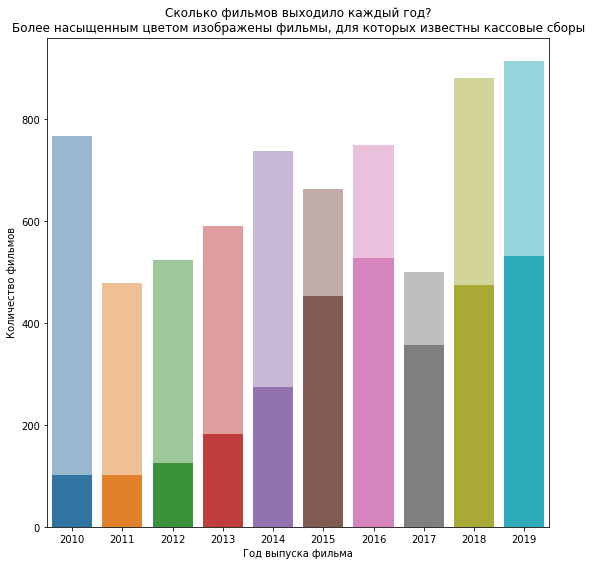

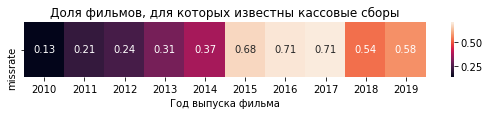

In [51]:
sns.countplot(x='film_release_year', data=data, alpha=0.5)
sns.countplot(
    x='film_release_year', data=data[~(data['box_office'].isna())]
).set(
    xlabel='Год выпуска фильма',
    ylabel='Количество фильмов',
    title='Сколько фильмов выходило каждый год?\nБолее насыщенным цветом изображены фильмы, для которых известны кассовые сборы'
)
plt.show()

missrate = {}
for year in data['film_release_year'].unique():
    mr = data.query("film_release_year == @year")['box_office'].isna().mean()
    missrate[year] = [1 - mr]

missrate_df = pd.DataFrame(missrate).T.sort_index().T
missrate_df.index = ['missrate']

plt.figure(figsize=(9, 1))
sns.heatmap(missrate_df, annot=True).set(
    xlabel='Год выпуска фильма',
    title='Доля фильмов, для которых известны кассовые сборы');

**ВЫВОД:**  
- Количество фильмов в прокате растет начиная с 2011, в 2015 и 2017 были просадки, возможно связанные с проблемами при сборе данных.  
- Процентное соотношение известных сборов к неизвестным возрастает с 2010 по 2017 год. В 2018 наблюдается резкое падение этого значения, предположительно связанное с резким увеличением количества фильмов.  
- 2010 год на третьем месте по количеству вышедших фльмов (после 2019 и 2018) и на первом по доле неизвестных сборов в прокате.  
- В 2017 году вышло наименьшее количество фильмов, но зато доля фильмов, для которых известна сумма сборов, - наибольшая.  
- Абсолютное количество фильмов, для которых неизвестны сборы, в 2011 и в 2010 году одинаковые, но из-за большой разницы в количестве вышедших фильмов за год, в относительных величинах разница существенная.  
- В 2014 году наблюдается резкое увеличение количества фильмов.
- В 2011 и с 2017 по 2019 не было ни одного фильма, которые собрал 0 рублей (пропуски считаются неизвестными значениями, а не нулями).

### Динамика проката по годам
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [52]:
data.groupby('film_release_year')['box_office'].agg(
    ['min', 'max', 'mean', 'median'])

,min,max,mean,median
film_release_year,,,,
2010,0.0,1.948760e+06,6.940187e+04,1868.000
2011,150.0,1.161808e+07,1.398969e+05,3364.000
2012,0.0,2.311220e+06,5.438756e+04,5660.000
2013,0.0,1.995703e+07,1.636987e+05,3522.500
2014,0.0,1.016411e+09,2.705976e+07,19610.000
2015,0.0,1.658861e+09,8.195399e+07,4654761.400
2016,0.0,2.048127e+09,9.515117e+07,4634774.865
2017,3000.0,2.779686e+09,1.360257e+08,9968340.000
2018,41225.0,2.271754e+09,1.047765e+08,8911533.935


Наибольший интерес вызывает резкое увеличение на несколько порядков среднего и медианы с 2014 до 2015 года.  
Разница в сборах между 2013 и 2015 годами в три порядка позволяет предположить, что до 2014 года сборы фиксировались в тысячах рублей, а после начали записываться в рублях.  
Исправим.

In [53]:
data.loc[
    data.query('film_release_year < 2014').index,
    'box_office'] = data.query('film_release_year < 2014')['box_office'] * 1000

data.groupby('film_release_year')['box_office'].agg(
    ['min', 'max', 'mean', 'median'])

,min,max,mean,median
film_release_year,,,,
2010,0.0,1.948760e+09,6.940187e+07,1868000.000
2011,150000.0,1.161808e+10,1.398969e+08,3364000.000
2012,0.0,2.311220e+09,5.438756e+07,5660000.000
2013,0.0,1.995703e+10,1.636987e+08,3522500.000
2014,0.0,1.016411e+09,2.705976e+07,19610.000
2015,0.0,1.658861e+09,8.195399e+07,4654761.400
2016,0.0,2.048127e+09,9.515117e+07,4634774.865
2017,3000.0,2.779686e+09,1.360257e+08,9968340.000
2018,41225.0,2.271754e+09,1.047765e+08,8911533.935


,film_release_year,box_office
2,2012,6.852833e+09
0,2010,7.078991e+09
4,2014,7.441434e+09
1,2011,1.426948e+10
3,2013,2.979317e+10
5,2015,3.712516e+10
9,2019,4.843005e+10
7,2017,4.856119e+10
8,2018,4.966408e+10
6,2016,5.023982e+10


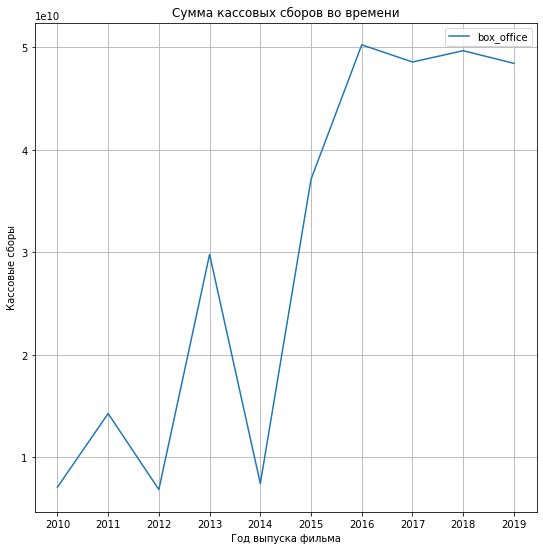

In [54]:
bo_sum_by_year = data.groupby('film_release_year',
                              as_index=False)['box_office'].sum()

display(bo_sum_by_year.sort_values(by='box_office'))

bo_sum_by_year.plot(x='film_release_year',
                    y='box_office',
                    xticks=range(2010, 2020),
                    grid=True,
                    xlabel='Год выпуска фильма',
                    ylabel='Кассовые сборы',
                    title='Сумма кассовых сборов во времени');

**ВЫВОД:**  
- Минимальная сумма сборов в прокате наблюдается в 2012 году, а максимальная в 2016.  
- За исключением просадки в 2012 и в 2014 наблюдается общая тенденция к росту кассовых сборов фильмов.    
- В период с 2016 по 2019 год кассовые сборы изменялись не сильно.
- Несмотря на малое количество фильмов в 2017 году, прокатные сборы в этом году были на уровне 2016, 2018 и 2019 годов, в которые вышло больше фильмов.

### Средняя и медианная сумма сборов
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [55]:
data.pivot_table(index='film_release_year',
                 values='box_office',
                 aggfunc=['mean', 'median']).droplevel(level=1, axis=1)

,mean,median
film_release_year,,
2010,6.940187e+07,1868000.000
2011,1.398969e+08,3364000.000
2012,5.438756e+07,5660000.000
2013,1.636987e+08,3522500.000
2014,2.705976e+07,19610.000
2015,8.195399e+07,4654761.400
2016,9.515117e+07,4634774.865
2017,1.360257e+08,9968340.000
2018,1.047765e+08,8911533.935


### Возрастное ограничение
- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [56]:
data[['age_restriction', 'box_office', 'film_release_year']].sample(5)

,age_restriction,box_office,film_release_year
1806,«18+» - запрещено для детей,4578468.0,2015
1436,«12+» - для детей старше 12 лет,1699681.5,2018
1051,«18+» - запрещено для детей,501467.0,2015
1598,«18+» - запрещено для детей,2595629.5,2019
911,«16+» - для детей старше 16 лет,256710.0,2016


Приведем столбец `age_restriction` к числовому типу

In [57]:
data['age_restriction'] = data['age_restriction'].apply(
    lambda x: int(x.split('+')[0][1:]))
data['age_restriction'].unique()

array([16,  0, 12,  6, 18])

Сделаем сводную таблицу, на ее основе построим тепловую карту.

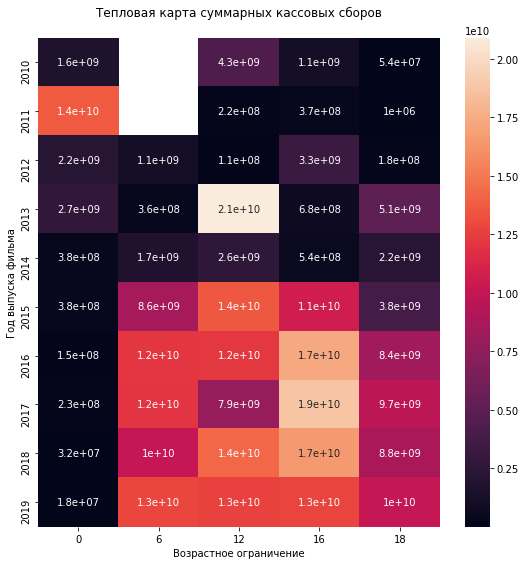

In [58]:
bo_by_year_age = data.pivot_table(index=['film_release_year'],
                                  columns=['age_restriction'],
                                  values='box_office',
                                  aggfunc='sum')

sns.heatmap(bo_by_year_age, annot=True, annot_kws={}).set(
    xlabel='Возрастное ограничение',
    ylabel='Год выпуска фильма',
    title='Тепловая карта суммарных кассовых сборов\n');

**ВЫВОД:**  
- В данных нет фильмов с возрастным ограничением 6+, которые вышли в 2010 и 2011 годах.  
- Фильмы с ограничем 0+ собирают меньше всего независмо от года. Это интересно, потому что наибольшее количество людей могут сходить на такой фильм. Значит большее влияние оказывает не ограничение по возрасту, а другие характеристики, например, жанр, режиссёр, тема фильма.  
- Аномально много собрали фильмы 0+ в 2011 году. Стоит подробнее разобраться там. Вероятно, есть какие-то выбросы.  
- Наибольшие сборы были у фильмов 12+ в 2013 году, далее следуют фильмы 16+ в 2017 году.  
- Наименьшие сборы - у фильмов 18+ в 2011 году, на втором с конца месте фильмы 2019 года с ограничением 0+.  
- На тепловой карте выделяется область от 6+ до 18+ и от 2015 до 2019 года. Сборы в этот период и у фильмов с этими ограничениями собирали в прокате больше всего.  
- В период с 2015 по 2019 картина сборов по разным возрастным категориям не меняется: десятки-сотни миллионов на фильмах 0+, единицы-десятки миллиардов на всех остальных категориях. В период с 2010 по 2014 аналогичная ситуация, но в меньшем масштабе. Я думаю, что разница между периодами связана со сбором данных. Предполагаю, что если бы в столбце `box_office` не было бы пропусков, то картина была бы однородной, потому что неокупающиеся фильмы не снимают. Соответственно в каждой категории стараются снимать фильмы, которые приносят прибыль. В таком случае, думаю, не было бы разницы внутри одной категории, но была бы разница между самими категориями из-за разной платежеспособности целевой аудитории.

## Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### ПОДГОТОВКА
Для начала составим список вопросов, которые мы хотим решить при помощи анализа данных:  
1) Правда ли, что финансируются из гос. бюджета только отечественные фильмы?  
2) Кто "любимый" режиссёр инвесторов? Продюсер? Меняются ли они от года к году?  
3) На какой жанр выделяют больше всего средств? Меньше? Существует ли незаслуженно обделенный вниманием жанр: такой на который выделяется мало средств, но фильмы этого жанра приносят больше всего денег? Какой жанр лучше всего окупается? Хуже всего?    
4) Кто самый большой "должник" (получил больше всего денег от гос-ва, но не вернул)?  
5) У какого фильма с гос поддержкой самые высокие рейтинги? Самые низкие?  

In [59]:
gov_data = data[~(data['refundable_support'].isna())].reset_index(drop=True)
display(gov_data.head())
gov_data.info()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,film_release_year,main_director,main_genre,support_per_budget,box_office
0,Я-Учитель,111019715,2015-12-02,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,12,0.0,35000000.0,91000000.0,Министерство культуры,7.4,"мелодрама,комедия",2015,С.Мокрицкий,мелодрама,0.384615,1550.0
1,Вдвоем на льдине.,111011015,2015-06-25,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",12,0.0,26500000.0,37943652.0,Министерство культуры,6.6,мелодрама,2015,Н.Джорджадзе,мелодрама,0.698404,4450.0
2,Битва с экстрасенсами,111011315,2015-07-20,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,12,0.0,25900000.0,59560746.0,"Министерство культуры, Фонд кино",5.4,"фэнтези,приключения",2015,И.Кордзаия,фэнтези,0.434850,6000.0
3,День До,111010916,2016-07-06,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",18,25000000.0,25000000.0,90822766.0,Фонд кино,4.8,"драма,фантастика",2016,А.Котт,драма,0.550523,9000.0
4,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,18,0.0,25000000.0,37371262.0,Министерство культуры,-1.0,драма,2015,К.Сухарьков,драма,0.668963,19820.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  331 non-null    object        
 1   pu_number              331 non-null    int64         
 2   show_start_date        331 non-null    datetime64[ns]
 3   type                   331 non-null    object        
 4   film_studio            331 non-null    object        
 5   production_country     331 non-null    object        
 6   director               331 non-null    object        
 7   producer               331 non-null    object        
 8   age_restriction        331 non-null    int64         
 9   refundable_support     331 non-null    float64       
 10  nonrefundable_support  331 non-null    float64       
 11  budget                 331 non-null    float64       
 12  financing_source       331 non-null    object        
 13  ratin

Для нескольких фильмов есть пропуск в столбце сборов. Заполним медианным значеним по жанру.

In [60]:
gov_data['box_office'].fillna(
    data.groupby('main_genre')['box_office'].transform('median'), inplace=True)
gov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  331 non-null    object        
 1   pu_number              331 non-null    int64         
 2   show_start_date        331 non-null    datetime64[ns]
 3   type                   331 non-null    object        
 4   film_studio            331 non-null    object        
 5   production_country     331 non-null    object        
 6   director               331 non-null    object        
 7   producer               331 non-null    object        
 8   age_restriction        331 non-null    int64         
 9   refundable_support     331 non-null    float64       
 10  nonrefundable_support  331 non-null    float64       
 11  budget                 331 non-null    float64       
 12  financing_source       331 non-null    object        
 13  ratin

### СТРАНЫ
- Правда ли, что финансируются из гос. бюджета только отечественные фильмы?
- Какие страны еще снимают фильмы на бюджетные деньги?

In [61]:
g = gov_data.groupby('production_country', as_index=False)['title'].count()
g

,production_country,title
0,Россия,315
1,Россия - Грузия,1
2,"Россия, Армения",1
3,"Россия, Бельгия, Финляндия",1
4,"Россия, Германия",2
5,"Россия, Германия, Великобритания",1
6,"Россия, Германия, Казахстан, Польша, Китай",1
7,"Россия, Италия",2
8,"Россия, Латвия, Чешская Республика",1
9,"Россия, Сербия",1


Действительно, все фильмы с гос бюджетом произведены в России. Для некоторых фильмов страной производства считается несколько стран, в состав которых всегда входит Россия.  
Составим топ стран кроме России, которые участвовали в создании фильмов с гос. поддержкой.

In [62]:
# poduction_country from str to list

g['production_country'] = g['production_country'].apply(
    lambda x: x.replace('-', ',').replace(' ', '').split(','))

country_dict = {}

for i in range(len(g)):
    for country in g.iloc[i]['production_country']:
        try:
            country_dict[country] += g.iloc[i]['title']
        except:
            country_dict[country] = g.iloc[i]['title']

top_countries = pd.DataFrame(country_dict,
                             index=['num_of_films'
                                    ]).T.sort_values(by='num_of_films',
                                                     ascending=False)
top_countries

,num_of_films
Россия,331
Германия,4
Польша,2
Украина,2
Латвия,2
Италия,2
Китай,2
Казахстан,1
Великобритания,1
Грузия,1


**ВЫВОД:**  
Совместно с Россией чаще всего снимает фильмы на государственные деньги Германия. Далее следуют Польша, Украина, Латвия, Италия, Китай и, незаметная с первого взгляда, Чехия.

### ЛЮДИ
- Кто "любимый" режиссёр инвесторов?  
- Продюсер?  
- Какие у их фильмов показатели?

Сперва найдем режиссёра и продюсера, которым выделяли деньги чаще всего.  
  
Замет рассмотрим следующие показатели:  
1) Количество фильмов, которые снял\спродюсировал каждый  
2) Любимый жанр режиссёра\продюсера  
3) Cуммарную гос. поддержку этих фильмов  
4) Суммарный бюджет фильмов  
5) Суммарные кассовые сборы  
6) Средний рейтинг фильма  

In [63]:
gov_data['main_producer'] = gov_data['producer'].apply(
    lambda x: x.split(', ')[0])

gov_data['total_support'] = gov_data['refundable_support'] + gov_data[
    'nonrefundable_support']

best_director = gov_data['main_director'].mode()[0]
bd_df = gov_data.query('main_director == @best_director')
bd_num_films = gov_data.value_counts(['main_director'])[0]
bd_fav_genre = bd_df['main_genre'].mode()[0]
bd_total_support = bd_df['total_support'].sum()
bd_total_budget = bd_df['budget'].sum()
bd_box_office = bd_df['box_office'].sum()
bd_avg_rat = bd_df['ratings'].mean()

best_producer = gov_data['main_producer'].mode()[0]
bp_df = gov_data.query('main_producer == @best_producer')
bp_num_films = gov_data.value_counts(['main_producer'])[0]
bp_fav_genre = bp_df['main_genre'].mode()[0]
bp_total_support = bp_df['total_support'].sum()
bp_total_budget = bp_df['budget'].sum()
bp_box_office = bp_df['box_office'].sum()
bp_avg_rat = bp_df['ratings'].mean()

w = {
    'name': [best_director, best_producer],
    'role': ['Режиссёр', 'Продюсер'],
    'num_films': [bd_num_films, bp_num_films],
    'favorite_genre': [bd_fav_genre, bp_fav_genre],
    'total_support': [bd_total_support, bp_total_support],
    'total_budget': [bd_total_budget, bp_total_budget],
    'box_office': [bd_box_office, bp_box_office],
    'avarage_rating': [bd_avg_rat, bp_avg_rat]
}

bd_bp_df = pd.DataFrame(w)
bd_bp_df

,name,role,num_films,favorite_genre,total_support,total_budget,box_office,avarage_rating
0,Р.Давлетьяров,Режиссёр,5,драма,4.598479e+08,7.704302e+08,2.023634e+10,6.780000
1,С.Сельянов,Продюсер,19,мультфильм,1.550000e+09,5.385412e+09,4.732505e+09,6.210526


**ВЫВОД:**  
Ренат Фаварисович Давлетьяров — советский и российский киноактёр, кинорежиссёр, сценарист, кинопродюсер и директор фильма. Президент Гильдии продюсеров России. Он чаще всех из режиссёров получал деньги от государства на съемки фильма. Статистика показывает, что снимал достаточно неплохое кино, которое окупалось в прокате. Любимый жанр - драма.  
  
Сергей Михайлович Сельянов — советский и российский кинорежиссёр, сценарист и продюсер. Руководитель кинокомпании «СТВ», соучредитель студии анимационного кино «Мельница». Продюсер таких фильмов и мультфильмов как "Брат", "Брат 2", "Алёша Попович и Тугарин Змей". Его результаты не слишком выдающиеся: в прокате суммарно его фильмы даже не вышли в ноль, средний рейтинг немного выше среднего. Любимый жанр - мультфильм, что неудивительно, ведь именно его студия производит все мультфильмы про богатырей. Он спродюсировал 19 фильмов, учитывая все выше сказанное, можно сказать, что стратегия Сергея - брать количесвом.

### ЖАНРЫ
- На какой жанр выделяют больше всего средств?  
- Меньше всео?  
- Существует ли незаслуженно обделенный вниманием жанр: такой на который выделяется мало средств, но фильмы этого жанра приносят больше всего денег?  
- Какой жанр лучше всего окупается?  
- Хуже всего?

In [64]:
box_office_top10 = gov_data.groupby(
    'main_genre', as_index=False)['box_office'].sum().sort_values(
        by='box_office', ascending=False).head(10)['main_genre']

box_office_bot10 = gov_data.groupby(
    'main_genre', as_index=False)['box_office'].sum().sort_values(
        by='box_office', ascending=False).tail(10)['main_genre']

,main_genre,box_office,total_support,payback_coef
0,комедия,3.242324e+10,3.218283e+09,10.074702
3,спорт,2.967768e+09,4.550000e+08,6.522568
7,военный,1.012130e+09,3.870009e+08,2.615318
2,мультфильм,5.655806e+09,2.600489e+09,2.174901
9,ужасы,7.101232e+08,3.550000e+08,2.000347
1,драма,1.142531e+10,5.864407e+09,1.948246
6,приключения,1.211786e+09,6.960000e+08,1.741072
5,история,1.455468e+09,1.020000e+09,1.426930
4,фантастика,1.720323e+09,1.406000e+09,1.223558
8,фэнтези,9.958366e+08,1.032900e+09,0.964117


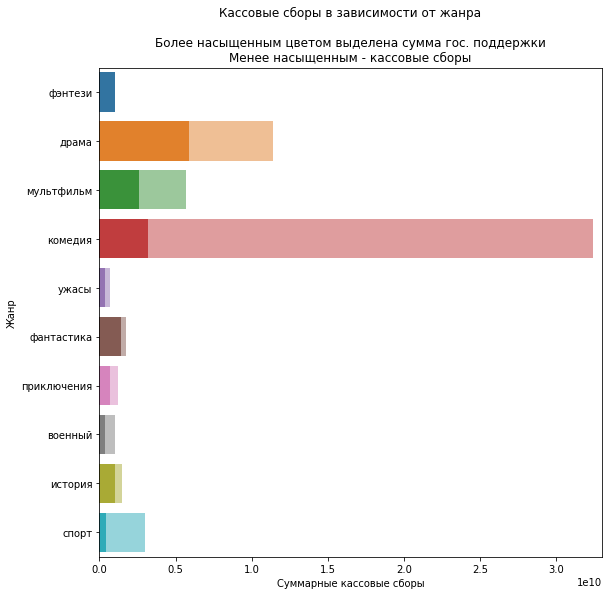

In [65]:
bo_sup_df = gov_data.groupby('main_genre',
                             as_index=False)['box_office'].sum().sort_values(
                                 by='box_office', ascending=False).head(10)

bo_sup_df = bo_sup_df.merge(
    (gov_data.groupby('main_genre', as_index=False)['total_support'].sum()),
    on='main_genre',
    how='left')

bo_sup_df[
    'payback_coef'] = bo_sup_df['box_office'] / bo_sup_df['total_support']

display(bo_sup_df.sort_values(by='payback_coef', ascending=False))

sns.barplot(x='total_support',
            y='main_genre',
            data=gov_data.query('main_genre in @box_office_top10'),
            ci=None,
            estimator=sum)

sns.barplot(x='box_office',
            y='main_genre',
            data=gov_data.query('main_genre in @box_office_top10'),
            alpha=0.5,
            ci=None,
            estimator=sum)

plt.title(
    'Кассовые сборы в зависимости от жанра\n\nБолее насыщенным цветом выделена сумма гос. поддержки\nМенее насыщенным - кассовые сборы'
)
plt.xlabel('Суммарные кассовые сборы')
plt.ylabel('Жанр')
plt.xlim((0, 3.3 * 10**10))
plt.show()

**ВЫВОД:**  
Больше всех в прокате среди фильмов с гос поддежркой собирают фильмы в жанре "Комедия". Наименьшую кассу приносят ужасы. Единственный неокупающийся жанр среди наиболее финансируемых - "Фэнтези". Очень хорошую окупаемость показывают фильмы в жанре "Спорт".

,main_genre,box_office,total_support,payback_coef
3,биография,5.168830e+08,112510000.0,4.594108
2,боевик,5.959289e+08,334000000.0,1.784218
1,семейный,6.035365e+08,339000000.0,1.780344
0,триллер,7.004502e+08,769645285.0,0.910095
4,криминал,2.397939e+08,280000000.0,0.856407
8,реальное ТВ,3.272110e+07,53000000.0,0.617379
6,мюзикл,1.017050e+08,240453119.0,0.422972
5,детектив,1.385475e+08,485000000.0,0.285665
7,мелодрама,5.690784e+07,398000000.0,0.142985
9,детский,7.973652e+06,119000000.0,0.067005


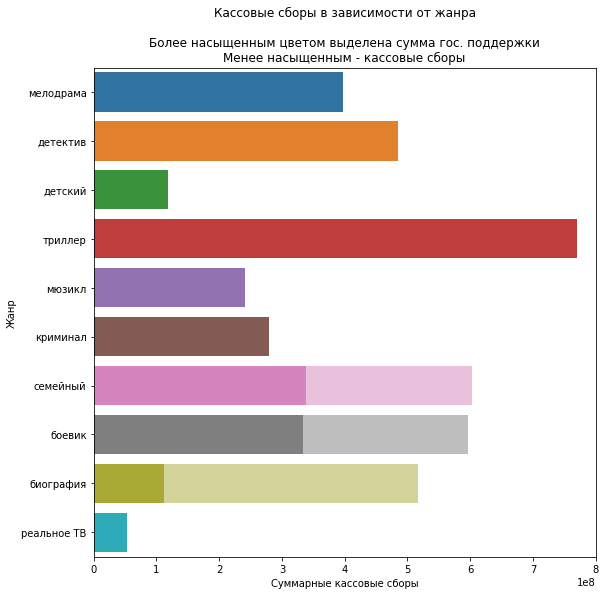

In [66]:
bo_sup_df = gov_data.groupby('main_genre',
                             as_index=False)['box_office'].sum().sort_values(
                                 by='box_office', ascending=False).tail(10)

bo_sup_df = bo_sup_df.merge(
    (gov_data.groupby('main_genre', as_index=False)['total_support'].sum()),
    on='main_genre',
    how='left')

bo_sup_df[
    'payback_coef'] = bo_sup_df['box_office'] / bo_sup_df['total_support']

display(bo_sup_df.sort_values(by='payback_coef', ascending=False))

sns.barplot(x='total_support',
            y='main_genre',
            data=gov_data.query('main_genre in @box_office_bot10'),
            ci=None,
            estimator=sum)

sns.barplot(x='box_office',
            y='main_genre',
            data=gov_data.query('main_genre in @box_office_bot10'),
            alpha=0.5,
            ci=None,
            estimator=sum)

plt.title(
    'Кассовые сборы в зависимости от жанра\n\nБолее насыщенным цветом выделена сумма гос. поддержки\nМенее насыщенным - кассовые сборы'
)
plt.xlabel('Суммарные кассовые сборы')
plt.ylabel('Жанр')
plt.xlim((0, 8 * 10**8))
plt.show()

**ВЫВОД:**  
Среди наименее финансируемых жанров больше всех получают триллеры, меньше всего денег выделяют детским фильмам и передачам на ТВ. Среди этой группы жанров много таких, которые не окупаются вовсе. Самый финансируемый среди них - "Детектив".

Рассчитаем дополнительно медиану коэффициента окупаемости для каждого жанра.

In [67]:
gov_data[
    'payback_coef_median'] = gov_data['box_office'] / gov_data['total_support']

bo_sup_df = gov_data.groupby('main_genre',
                             as_index=False)['box_office'].sum().sort_values(
                                 by='box_office', ascending=False)

bo_sup_df = bo_sup_df.merge(
    (gov_data.groupby('main_genre', as_index=False)['total_support'].sum()),
    on='main_genre',
    how='left')

bo_sup_df[
    'payback_coef'] = bo_sup_df['box_office'] / bo_sup_df['total_support']

res = pd.merge(
    bo_sup_df,
    gov_data.groupby('main_genre',
                     as_index=False)['payback_coef_median'].median(),
    how='left',
    on='main_genre')

res.sort_values(by='payback_coef', ascending=False).reset_index(drop=True)

,main_genre,box_office,total_support,payback_coef,payback_coef_median
0,комедия,3.242324e+10,3.218283e+09,10.074702,0.967420
1,спорт,2.967768e+09,4.550000e+08,6.522568,4.217221
2,биография,5.168830e+08,1.125100e+08,4.594108,1.901503
3,военный,1.012130e+09,3.870009e+08,2.615318,0.991127
4,мультфильм,5.655806e+09,2.600489e+09,2.174901,1.416342
5,ужасы,7.101232e+08,3.550000e+08,2.000347,1.095530
6,драма,1.142531e+10,5.864407e+09,1.948246,0.094646
7,боевик,5.959289e+08,3.340000e+08,1.784218,1.223690
8,семейный,6.035365e+08,3.390000e+08,1.780344,2.056010
9,приключения,1.211786e+09,6.960000e+08,1.741072,1.595918


**ВЫВОД:**  
Самый окупающиеся фильмы снимаются в жанрах "Спорт", "Семейный" и "Биография". Худшими по этому показателю оказались жанры "Детский", "Мелодрама" и "Драма".  
Интересно, что наихудшим коэф. окупаемости обладает жанр "Детский", но жанр "Мультфильм" имеет значение этого коэффициента больше 1. Стоит поближе рассмотреть принцип отнесения кино к этим жанрам.  
  
- Одномременно высокие `payback_coef` и `payback_coef_median` говорят о том, что фильмы в этом жанре стабильно окупаются. Примерами таких жанров являются: "Спорт", "Биография", "Семейный".  
- Если общий коэффициент `payback_coef` большой, а усредненный по всем фильмам жанра `payback_coef_median` близок к 1, значит, что фильмов в этом жанре снимается много, каждый из которых выходит в ноль, имеет минимальную прибыль или минимальный убыток, но существуют выбросы, которые приносят основную прибыль в этом жанре. Например фильмы в жанре "Комедия", "Военный", "Ужасы"  
- Жанры, для которых оба коэффициента меньше 1, не окупаются. С финансовой точки зреня лучше было бы пркратить выделение средств на эти фильмы. Например, "Детский", "Мелодрама", "Детектив".  
- Незаслуженно обделенным вниманием остался жанр "Биография". Фильмы этого жанра хорошо окупаются в прокате, но получают сравнительно мало финансирования из государственного бюджета.

### ВОЗВРАТНЫЕ СРЕДСТВА ГОСУДАРСТВЕННОЙ ПОДДЕРЖКИ
Кто самый большой "должник" (получил больше всего денег от гос-ва, но не вернул)?

In [68]:
gov_data['debt'] = gov_data['refundable_support'] - gov_data['box_office']
gov_data['debt'] = gov_data['debt'].apply(lambda x: 0 if x < 0 else x)
gov_data['debt'].describe()

count    3.310000e+02
mean     1.512660e+06
std      7.176753e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.788113e+07
Name: debt, dtype: float64

In [69]:
debt_df = gov_data.query('debt != 0')
debt_df[[
    'title', 'main_director', 'main_producer', 'refundable_support', 'budget',
    'box_office'
]]

,title,main_director,main_producer,refundable_support,budget,box_office
3,День До,А.Котт,А.Цекало,25000000.0,90822766.0,9000.00
12,Сдается дом со всеми неудобствами,В.Сторожева,К.Шахназаров,3500000.0,69428728.0,55800.00
15,Память осени,А.Соколов,Э.Айнулова,9000000.0,70000000.0,58500.00
31,Наследники (2015),В.Хотиненко,С.Кравец,7153119.0,50218741.0,194780.00
50,Мотылёк.,К.Худяков,Е.Бабенко,7346881.0,63170000.0,410058.00
53,Рок,И.Шахназаров,В.Малышев,10000000.0,59937470.0,476180.00
66,Семь пар нечистых,К.Белевич (псевдоним - Кирилл Астахов),Д.Потемкин,19000000.0,181302726.0,807011.50
84,"Милый Ханс, дорогой Петр",А.Миндадзе,А.Миндадзе,15000000.0,134000000.0,1307120.01
86,Тайна Снежной королевы,Н.Бондарчук,С.Кабанова,20000000.0,215860000.0,1434072.50
95,Яна + Янко,Н.Меркулова,А.Семенов,15000000.0,68809226.0,1802175.00


In [70]:
debt_df.groupby('main_director', as_index=False)['debt'].sum().sort_values(
    by='debt', ascending=False).reset_index(drop=True).head(10)

,main_director,debt
0,Ф.Бондарчук,97881126.00
1,М.Бальчюнас (псевдоним М.Вайсберг),33811018.50
2,Ю.Васильев,28569373.18
3,А.Цицилин,28482223.27
4,Э.Веливис,25177853.49
5,А.Котт,24991000.00
6,Э.Оганесян,24345473.70
7,А.Касаткин,21332808.00
8,А.Нужный,20799175.50
9,И.Учитель,20045492.00


Какой средний рейтинг фильмов, создатели которых не смогли вернуть деньги государству?

In [71]:
print(f"Средний рейтинг {debt_df['ratings'].mean():.2f}")

Средний рейтинг 5.40


### РЕЙТИНГИ
У какого фильма с гос поддержкой самые высокие рейтинги? Самые низкие?

In [72]:
gov_data.sort_values(by='ratings', ascending=False)[[
    'title', 'main_director', 'main_producer', 'budget', 'box_office',
    'ratings'
]].head(10)

,title,main_director,main_producer,budget,box_office,ratings
43,Главный,Ю.Кара,Ю.Кара,40000000.0,3.347500e+05,9.4
65,Я умею вязать,Н.Степанова при участии С.Иванова,С.Кикнавелидзе,14462464.0,8.013700e+05,9.0
269,А зори здесь тихие..._,Р.Давлетьяров,Неизвестно,220588394.0,2.491668e+08,8.5
267,БОЛЬШОЙ,В.Тодоровский,В.Тодоровский,320000000.0,2.285782e+08,8.5
291,Миллиард,Р.Прыгунов,В.Маслов,240041307.0,4.086467e+08,8.2
46,Пока еще жива,А.Атанесян,А.Атанесян,79411900.0,3.653536e+08,8.1
50,Мотылёк.,К.Худяков,Е.Бабенко,63170000.0,4.100580e+05,8.0
325,Байкал - Сердце мира 3D,А.Попова,И.Добровольский,33000000.0,1.911179e+07,8.0
255,Герой,К.Оганисян,К.Оганисян,250000000.0,1.728713e+08,7.9
152,Однажды._,Р.Давлетьяров,Р.Давлетьяров,156360666.0,1.274840e+07,7.9


В данных наверняка присутствуют ошибки в столбце `ratings`.  
  
Возможно, данные были собраны не на портале КиноПоиск (в описании данных к проекту сказано обратное). Возможно, данные были собраны по прошествии слишком малого времени и количество оценок было малым. Возможно, это преднамеренное искажение данных, чтобы показать ложные успехи заинтересованным лицам.

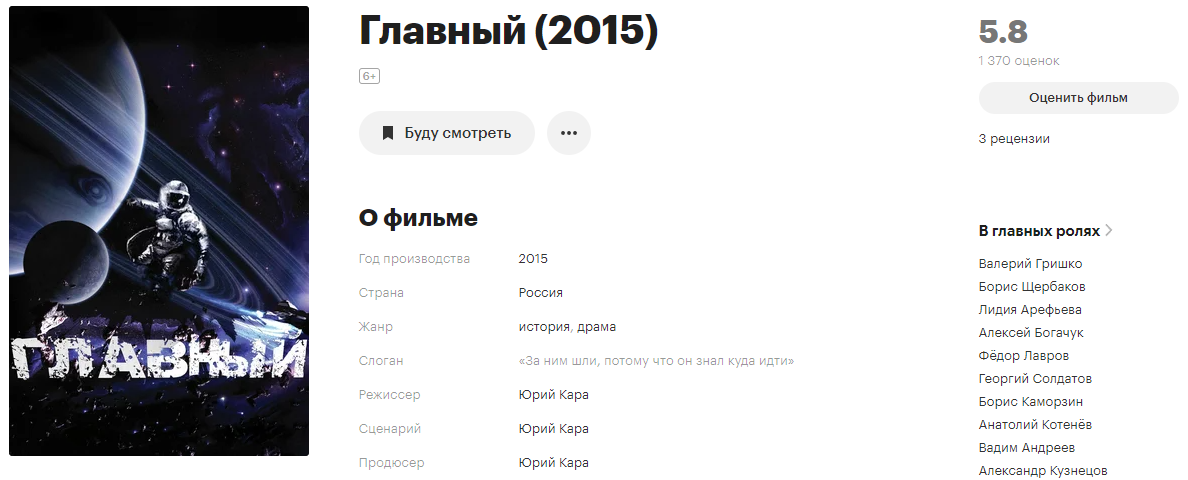
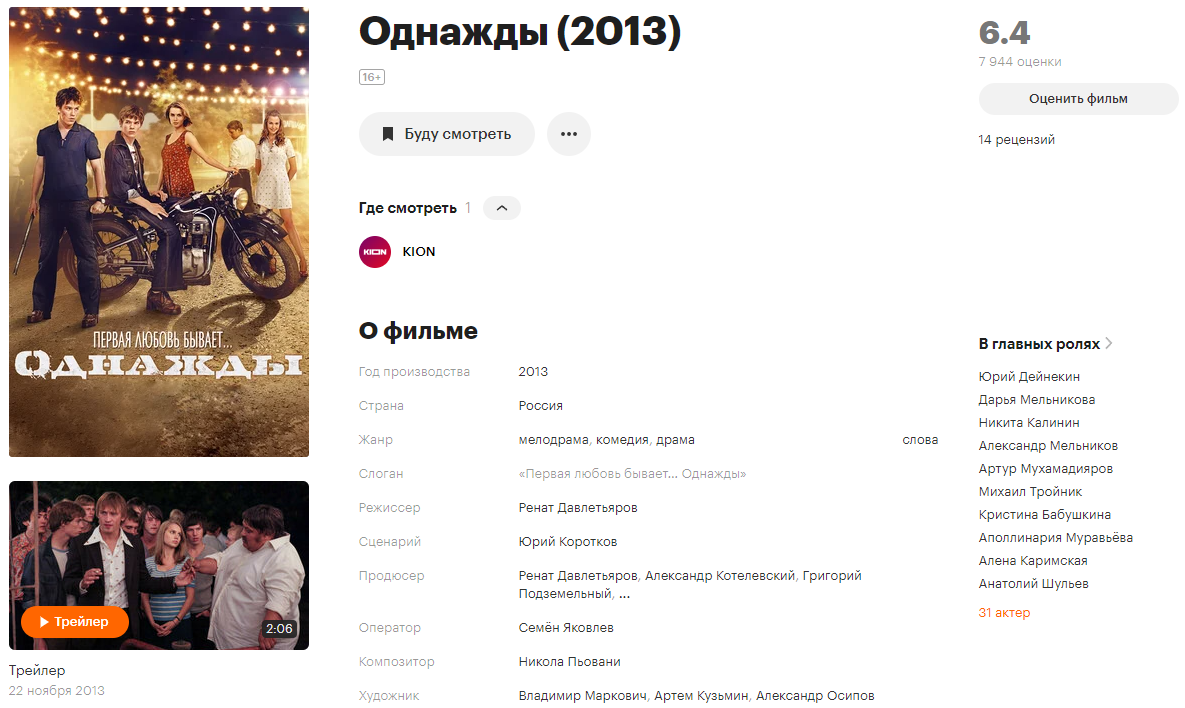

## Напишите общий вывод

**ПРОБЛЕМЫ В ДАННЫХ:**  
1) Значения в столбце с номером прокатного удостоверния в датасете `mkrf_movies` имеют строковый тип, что мешает корректной работе. Одно значение начиналось с пробела. Одно было не числом, а словом "нет". Потребовалось сначала устранить эти ошибки, а затем привести данные к числовому типу.   
2) Зачения рейтинга также имеют строковый тип. Для некоторых фильмов рейтинг указан в процентах, а не по 10-тибалльной системе как для большинства. Аналогично номеру ПУ потребовалось преобразование к числу с плавающей запятой.  
3) Имя столбца с номером удостоверения не соответсвует snake_case_style.  
4) В данных большое количество пропусков. Некоторые из них нужно было отсавить, потому что эта информация понадобилась для дальнейшего анализа. Остальные были заполнены исходя из смысла столбца, значений других столбцов той же строки, характера пропуска.  
5) Практически во всех категориальных столбцах наблюдается одна и та же проблема - лишние пробелы в начале/конце строки.  
6) В данных присутствуют фильмы, которым оказывалась гос. поддержка, но бюджет для них равен нулю. Ориентировочное значение бюджета этих фильмов было восстановлено на основе других фильмов, для которых такой ошибки не было допущено.  
7) В данных были дубликаты, которые появились из-за того, что одному и тому же фильму было выдано несколько разных прокатных удостоверений.  
  
**ИНТЕРЕСНЫЕ ЯВЛЕНИЯ В ДАННЫХ:**  
1) Существуют разные фильмы, которые имеют одинаковое название и жанр.  
2) Существуют фильмы, сборы для которых разбиты на несколько записей. В некоторых из них сильно отличается дата премьеры - можно предположить, что фильм показали в кинотеатре несколько раз в разное время. Для большинства записи абсолютно идентичны - в этом случае нужно разобраться, почему фильм получил несколько ПУ, тогда, скорее всего, станет понятно почему сборы разбиты на несколько записей.  
3) С 2011 года количество фильмов, вышедших в прокат растет, за исключением локальных просадок в 2015 и 2017 годах. Возможно, это особенности сбора данных.
4) Процентное соотношение известных сборов к неизвестным возрастает в целом от года к году возрастает.  
5) В 2010 снято аномально много фильмов.  
6) В 2017 же году вышло аномально мало фильмов.  
7) Минимальная сумма сборов в прокате наблюдается в 2012 году, а максимальная в 2016.  
8) Наблюдается общая тенденция к росту кассовых сборов фильмов.  
9) В 2014 году наблюдается резкий скачок как кассовых сборов, так и количества вышедших фильмов.  
10) В период с 2016 по 2019 год кассовые сборы оставались примерно одинаковыми.
11) В данных нет фильмов с возрастным ограничением 6+, которые вышли в 2010 и 2011 годах.  
12) Фильмы с ограничем 0+ собирают меньше всего независмо от года.    
13) Аномально много собрали фильмы 0+ в 2011 году.  
14) Наибольшие сборы были у фильмов 12+ в 2013 году.  
15) Наименьшие сборы - у фильмов 18+ в 2011 году.  
16) Сборы фильмов с ограничением от 6+ до 18+ в период с 2015 по 2019 года собирали в прокате больше всего.  
17) Существует два периода времени, внутри которых сборы не зависят от возрастных ограничений: с 2015 по 2019 и с 2010 по 2014.    

**РЕЗУЛЬТАТЫ АНАЛИЗА ФИЛЬМОВ, ПОЛУЧИВШИХ ГОСУДАРСТВЕННУЮ ПОДДЕРЖКУ:**  
1) Обнаружилось несколько пропусков в столбце `box_office`. В других столбцах пропусков не было или они были устранены вместе с остальными.  
2) Все фильмы, которые получали поддржку от государства производились в России. Некоторые фильмы были сняты несколькими странами. Чаще всего отечественные киноделы сотрудничали со своими коллегами из Германии, Польши и Украина.  
3) Чаще всех из режиссёров поддежрку получал Ренат Давлетьяров. Его фильмы приносят прибыль и имеют средний рейтинг около 7. Вполне хороший результат.  
4) Продюсировал фильмы с государственной поддержкой чаще других Сергей Сельянов, продюссер "Брата" и один из создателей анимационной студии "Мельница". Его фильмы были менее удачны в прокате, а средняя оценка на КиноПоиске приближается к 6.  
5) Больше всех в прокате среди фильмов с гос поддежркой собирают фильмы в жанре "Комедия".  
6) Наименьшую кассу приносят ужасы.  
7) Единственный неокупающийся жанр среди 10 наиболее финансируемых - "Фэнтези".
8) Среди 10 наименее финансируемых жанров больше всех поддержку получают триллеры.  
9) Меньше всего денег выделяют детским фильмам и передачам на ТВ.  
10) Много жанров, которые не окупаются вовсе. Наиболее финансируемый среди них - "Детектив".
11) Самые окупающиеся фильмы снимаются в жанрах "Спорт", "Семейный" и "Биография".  
12) Худшими по показателю окупаемости оказались жанры "Детский", "Мелодрама" и "Драма".  
13) Фильмы в жанрах "Спорт", "Биография" и "Семейный" стабильно окупаются.  
14) Фильмов в жанре "Комедия", "Военный", "Ужасы" снимается много, каждый из которых выходит в ноль, имеет минимальную прибыль или минимальный убыток, но существуют выбросы, которые приносят основную прибыль внутри жанра, поэтому в общей картине фильмы этих жанров окупаются.  
15) Незаслуженно обделенным вниманием остался жанр "Биография". Фильмы этого жанра хорошо окупаются в прокате, но получают сравнительно мало финансирования из государственного бюджета.  
16) Фёдор Бондарчук, согласно предоставленным данным, не вернул государтсву немногим меньше 100 000 000 рублей, которые получил на свои неокупившиеся фильмы.  
17) Средний рейтинг фильмов, после проката которых создатели не смогли вернуть государству выделенные средства ниже 5.5.  
18) Согласно предоставленным данным, наилучшим фильмом с государственной финансовой поддержкой стал фильм "Герой", однако после буквально 30 секунд поиска подтверждающей информации в интернете оказалось, что в данных существенно завышены оценки. С чем это связано - неизветсно. Согласно описанию данных, рейтинги брались с сайта КиноПоиск, что не соответствует действительности.  
  
**P.S.:**  
Ситуация аналогичная рейтингам, наблюдается и для кассовых сборов, и для бюджетов (в исследовании это не показано, но в процессе выполнения было замечено множество фактов не соответствия). Это в целом ставит под сомнения результат настоящего исследования и надежность источника данных.